## Evaluation Metrics and Scoring

## Metrics for Binary Classification

- __RMSE__ and __MAE__ represent error rate on training data set. They indicate how well a model fits a training set. They capture the discrepancy between the observed labels and the labels predicted by a model.
    - RMSE
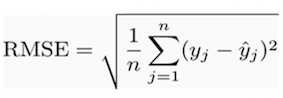

    - MAE
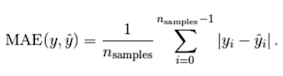

    - R2_SCORE
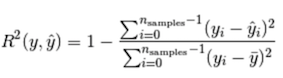

- __Confusion Matrix__: 

    矩阵每一列代表预测值，每一行代表的是实际的类别。这个名字来源于它可以非常容易的表明多个类别是否有混淆（也就是一个class被预测成另一个class）, 混淆矩阵是除了ROC曲线和AUC之外的另一个判断分类好坏程度的方法。
    
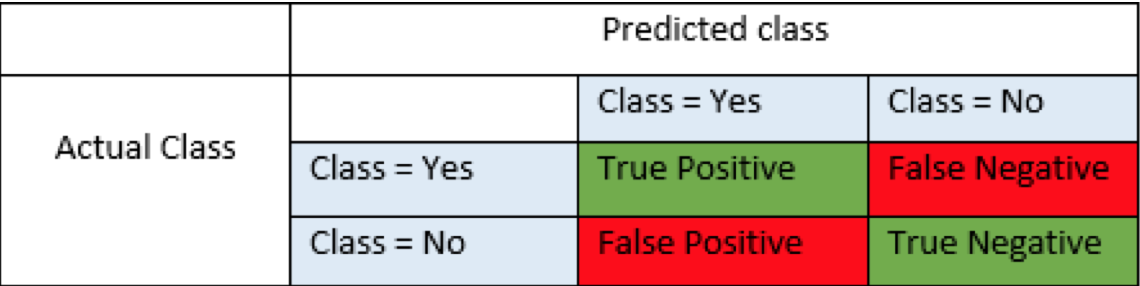
   - __TP__ = True Positive  真实class为Yes，预测class也为Yes
   - __TN__ = True Negative  真实class为No，预测class也为No
   - __FP__ = False Positive 真实class为No，预测class也为Yes
   - __FN__ = False Negative 真实class为Yes，预测class也为No



- __Accuracy__ = (TP + TN)/(TP + TN + FP + FN)  
    
    模型整体的准确性。
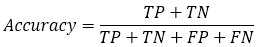
      
      
- __Precision__ = TP/(TP + FP)  # 查准率 = 精度 = precision 
    
    对于模型分类中莫个类别的测量。分母是预测为正的样本数 Measure how many of the samples predicted as positive are actually positive
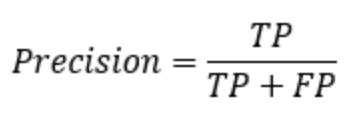
             
             
- __Recall__ = TP/(TP + FN)     # 查全率 = 召回率 = recall
    
    对于模型分类中莫个类别的测量。分母是原来样本中所有的正样本数 Measures how many of the positive samples are captured by the positive predictions:
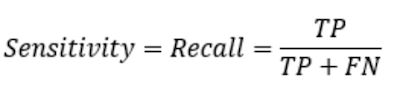


- __F-measure__ = 2* (precision * recall) / (precision + recall)
    
    模型整体的准确性。The F-measure of a model takes a value between 0 and 1. The best model has an F-measure equal to 1, whereas a model with an F-score of 0 is the worst.
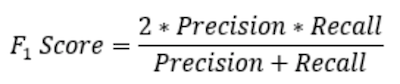
      
        

## An example for 3 classes. 


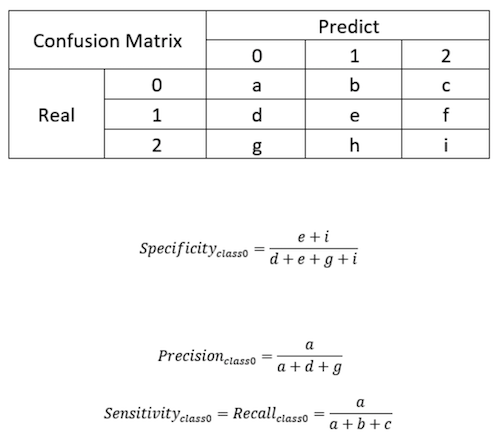


---
## Evaluation Model Example by recognizing digital number with different model. 

In [11]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp 
print("scipy version: {}".format(sp.__version__))

import IPython 
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("sklearn version: {}".format(sklearn.__version__))

import mglearn
print("mglearn version: {}".format(mglearn.__version__))

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

Python version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.24.2
matplotlib version: 3.0.3
numpy version: 1.15.4
scipy version: 1.1.0
IPython version: 7.4.0
sklearn version: 0.20.1
mglearn version: 0.1.7


In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# load dataset 
digits = load_digits()
y = digits.target == 9 

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

# using DummyClassifier
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))


Unique predicted labels: [False]
Test score: 0.90


In [3]:
# using DecisionTree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [4]:
# using LogisticRegression
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy_majority.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))


dummy score: 0.82
logreg score: 0.98


## Using confusion_matrix

---

Confusion matrix:
[[401   2]
 [  8  39]]


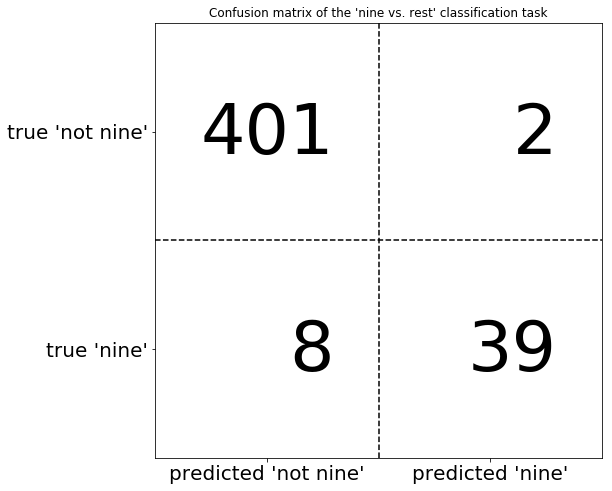

In [5]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

mglearn.plots.plot_confusion_matrix_illustration()
plt.title("Confusion matrix of the 'nine vs. rest' classification task")
plt.show()

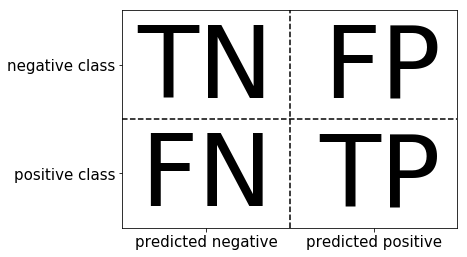

In [6]:
mglearn.plots.plot_binary_confusion_matrix()
plt.show()

In [7]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))

print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))

print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))

print("\nLogistic Regression:")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression:
[[401   2]
 [  8  39]]


In [8]:
# suppress warnings.
import warnings
warnings.filterwarnings("ignore") 

from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.00
f1 score tree: 0.55
f1 score logistic regression: 0.89


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [10]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [11]:
print(classification_report(y_test, pred_tree, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.94      0.97      0.95       403
        nine       0.64      0.49      0.55        47

   micro avg       0.92      0.92      0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [12]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



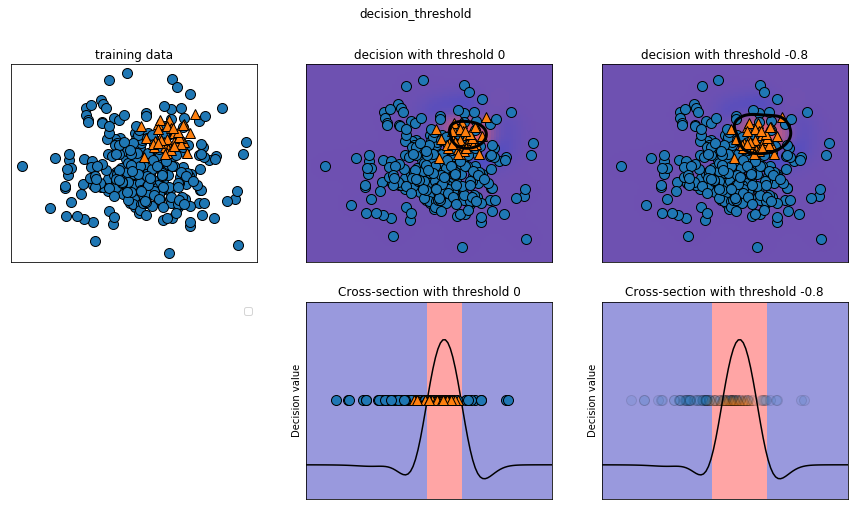

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

   micro avg       0.88      0.88      0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [13]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC

X,y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)

mglearn.plots.plot_decision_threshold()
plt.show()

print(classification_report(y_test, svc.predict(X_test)))

In [14]:
y_pred_lower_threshold = svc.decision_function(X_test) > -0.8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

   micro avg       0.83      0.83      0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



---
## Precision-recall curves and ROC curves
---
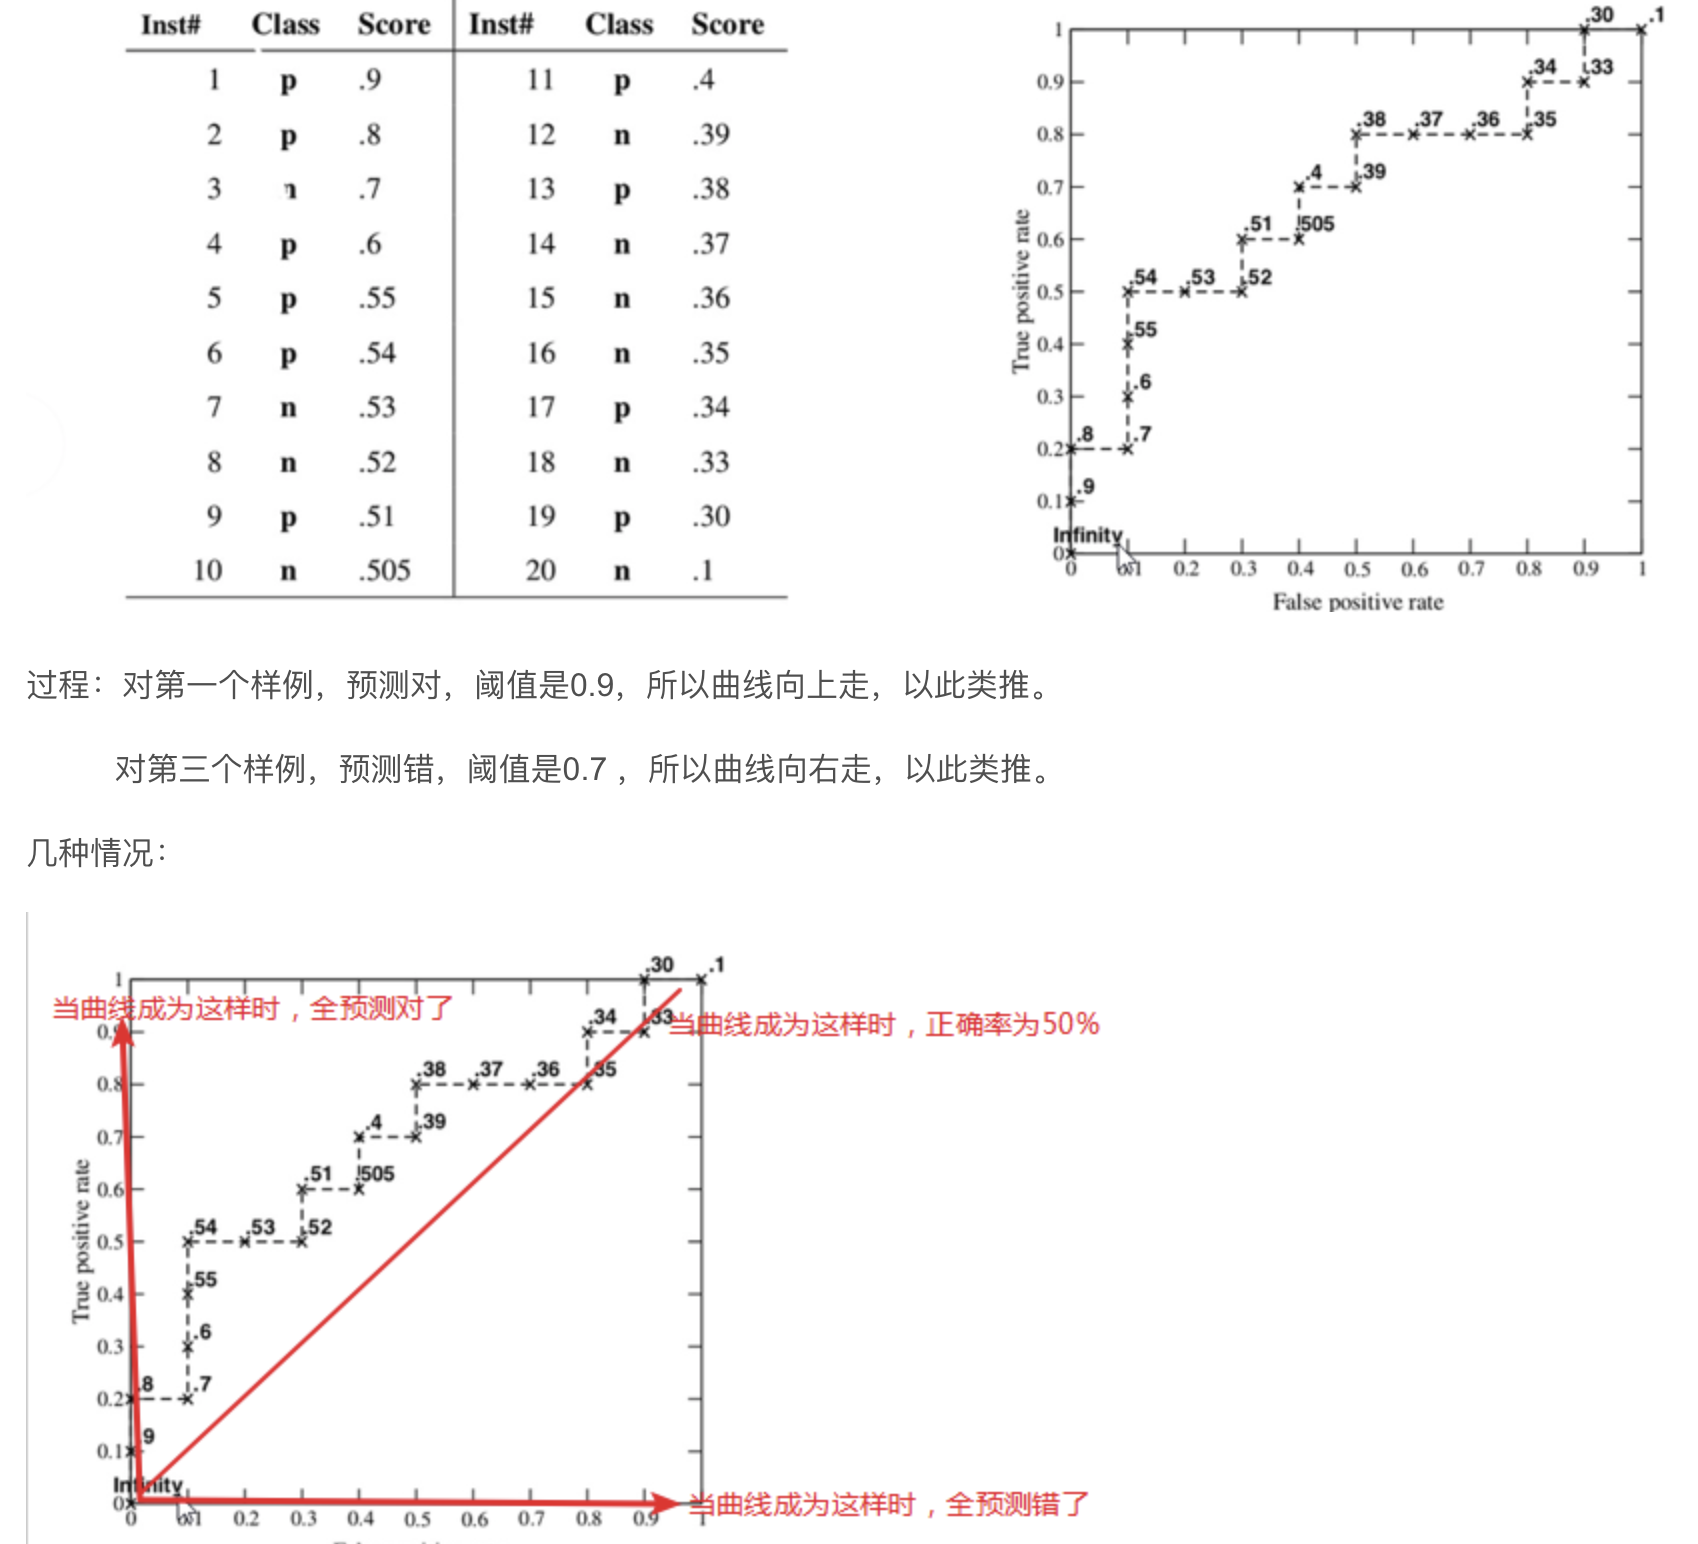

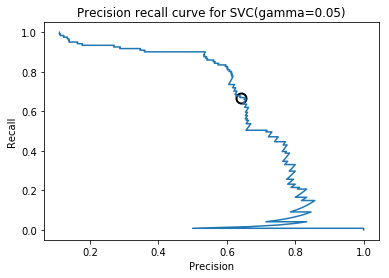

In [15]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# Use more data points for a smoother curve 
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=0.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, 
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision recall curve for SVC(gamma=0.05)")
plt.show()

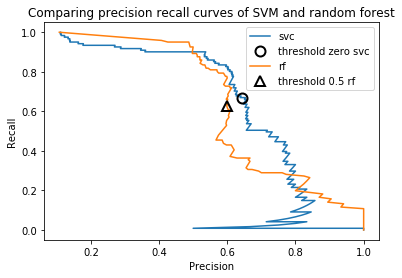

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(precision,recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, 
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10, 
         label="threshold 0.5 rf", fillstyle="none", c='k', mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("Comparing precision recall curves of SVM and random forest")
plt.show()

print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

In [17]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


---
## Receiver operatiing characteristics (ROC) and AUC
---
         
ROC曲线指受试者工作特征曲线/接收器操作特性(receiver operating characteristic，ROC)曲线,是反映灵敏性和特效性连续变量的综合指标,是用构图法揭示敏感性和特异性的相互关系，它通过将连续变量设定出多个不同的临界值，从而计算出一系列敏感性和特异性。ROC曲线是根据一系列不同的二分类方式（分界值或决定阈），以真正例率（也就是灵敏度）（True Positive Rate,TPR）为纵坐标，假正例率（1-特效性）（False Positive Rate,FPR）为横坐标绘制的曲线。

ROC观察模型正确地识别正例的比例与模型错误地把负例数据识别成正例的比例之间的权衡。TPR的增加以FPR的增加为代价。ROC曲线下的面积是模型准确率的度量，AUC（Area under roccurve）。

```
- 纵坐标：真正率（True Positive Rate , TPR）或灵敏度（sensitivity）

    TPR = TP /（TP + FN）  （正样本预测结果数 / 正样本实际数）

- 横坐标：假正率（False Positive Rate , FPR）

    FPR = FP /（FP + TN） （被预测为正的负样本结果数 /负样本实际数）
```
       

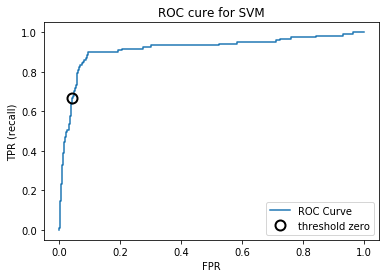

In [18]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closets to zero 
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, 
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.title("ROC cure for SVM")
plt.show()

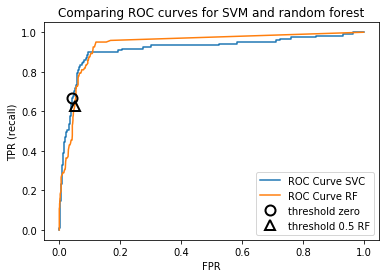

In [19]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closets to zero 
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, 
         label="threshold zero", fillstyle="none", c='k', mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, 
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)
plt.title("Comparing ROC curves for SVM and random forest")
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


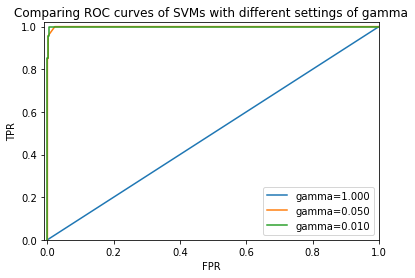

In [21]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label='gamma={:.3f}'.format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
plt.title("Comparing ROC curves of SVMs with different settings of gamma")
plt.show()
    

Automatically created module for IPython interactive environment


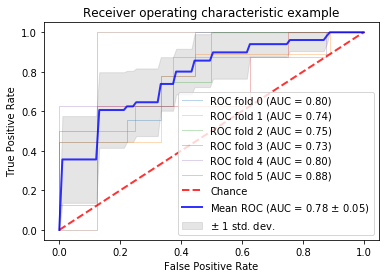

In [5]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


---
## Metrics for Multicalss Classification
---

In [22]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, pred)))


Accuracy: 0.953
Confusion matrix:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


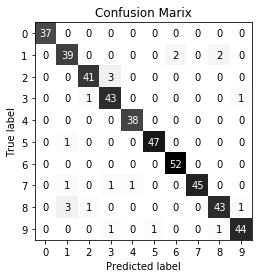

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [23]:
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), 
                                     xlabel='Predicted label', ylabel='True label',
                                     xticklabels=digits.target_names,
                                     yticklabels=digits.target_names, 
                                     cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion Marix")
plt.gca().invert_yaxis()
plt.show()

print(classification_report(y_test, pred))

In [24]:
# "macro" - averaging computes the unweighted per-class f-scores. 
#           This gives equal weight to all classes, no matter what their size is. 
# "micro" - averaging computes the total number of false positives, false negatives and true positives 
#           over all classes, and then computes precision, recall, and f-score using these counts
# "weighter" - averaging computes the mean of the per-class f-score, weighted by their support. 
#              This is what is reported in the classification report. 

print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.953
Micro average f1 score: 0.954


## Regression Metrics

In [25]:
from sklearn.model_selection import cross_val_score

# default scoring for classification is accuracy
print("Default scoring: {}".format(cross_val_score(SVC(), digits.data, digits.target == 9)))

# providing scoring="accuracy" dosen't change the results. 
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring = "accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))

# providing scoring="roc_auc" 
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring ="roc_auc")
print("AUC scoring: {}".format(roc_auc))


Default scoring: [0.89983306 0.89983306 0.89983306]
Explicit accuracy scoring: [0.89983306 0.89983306 0.89983306]
AUC scoring: [0.99372294 0.98957947 0.99594929]


In [26]:
from sklearn.model_selection import GridSearchCV

X_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point: 
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Serach with default scoring parameter, which equals to accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Serach with default scoring parameter, which equals to accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy): 0.970
Test set AUC: 0.992
Test set accuracy: 0.973


In [27]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='roc_auc')
grid.fit(X_train, y_train)
print("Grid-Serach with AUC, scoring parameter ='roc_auc'")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Serach with AUC, scoring parameter ='roc_auc'
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.997
Test set AUC: 1.000
Test set accuracy: 1.000


In [28]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers: \n{}".format(sorted(SCORERS.keys())))

Available scorers: 
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


In [57]:
dir(sklearn.metrics)

['SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'base',
 'brier_score_loss',
 'calinski_harabaz_score',
 'classification',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_similarity_score',
 'label_ranking_average_precision_score',
 'label_ranking_loss',
 'log_loss',
 'make_scorer',
 'matthews_corrcoef',
 'mean_absolute_error',
 'mean_squared_error',
 'median_absolute_error',
 'mutual_info_score',
 'normalized_mutual_info_score',
 'pairwise',
 'pairwise_distanc

---
## R2_Score
---

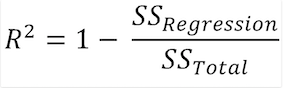
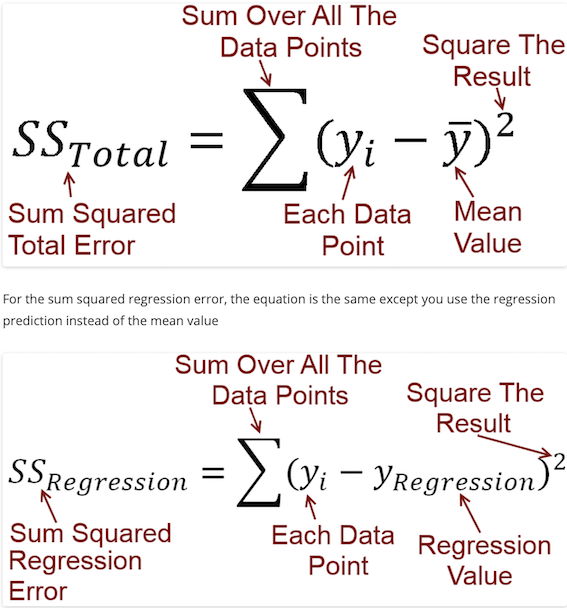

1. An R2 of 1.0 is the best. It means you have no error in your regression.
2. An R2 of 0 means your regression is no better than taking the mean value, i.e. you are not using any information from the other variables
3. A Negative R2 means you are doing worse than the mean value. However maybe summed squared error isn’t the metric that matters most to you and this is OK.  (For instance, maybe you care most about mean absolute error instead)

### Refer TO:
- http://www.fairlynerdy.com/what-is-r-squared/#comments

Automatically created module for IPython interactive environment


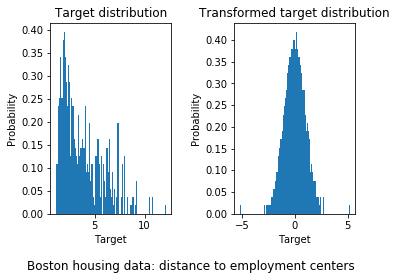

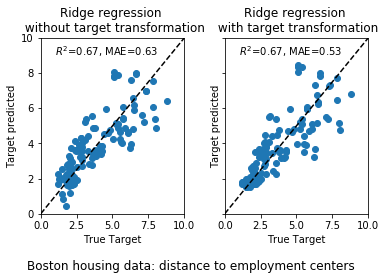

In [5]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import QuantileTransformer, quantile_transform
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import median_absolute_error, r2_score

print(__doc__)


# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}
    

dataset = load_boston()
target = np.array(dataset.feature_names) == "DIS"
X = dataset.data[:, np.logical_not(target)]
y = dataset.data[:, target].squeeze()
y_trans = quantile_transform(dataset.data[:, target],
                             output_distribution='normal').squeeze()


f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y, bins=100, **density_param)
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

ax1.hist(y_trans, bins=100, **density_param)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution')

f.suptitle("Boston housing data: distance to employment centers", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

regr = RidgeCV()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0.scatter(y_test, y_pred)
ax0.plot([0, 10], [0, 10], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Ridge regression \n without target transformation')
ax0.text(1, 9, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
ax0.set_xlim([0, 10])
ax0.set_ylim([0, 10])

regr_trans = TransformedTargetRegressor(
    regressor=RidgeCV(),
    transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)

ax1.scatter(y_test, y_pred)
ax1.plot([0, 10], [0, 10], '--k')
ax1.set_ylabel('Target predicted')
ax1.set_xlabel('True Target')
ax1.set_title('Ridge regression \n with target transformation')
ax1.text(1, 9, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 10])

f.suptitle("Boston housing data: distance to employment centers", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

plt.show()

---
## Example with learning_curve and validation_curve
---

learning_curve:---------------train_size--------------
[0.1, 0.2, 0.4, 0.6, 0.7, 0.8]
learning_curve:---------------train_scores--------------
[[0.93283582 0.97014925 0.97014925 0.94029851]
 [0.91449814 0.95539033 0.9330855  0.91449814]
 [0.90892193 0.88847584 0.91821561 0.89219331]
 [0.90717822 0.88242574 0.88985149 0.8799505 ]
 [0.89171975 0.89596603 0.88853503 0.89065817]
 [0.87465181 0.8904364  0.87836583 0.88950789]]
learning_curve:---------------test_scores--------------
[[0.71555556 0.81777778 0.78222222 0.76222222]
 [0.82       0.84888889 0.81555556 0.80222222]
 [0.82222222 0.85333333 0.85555556 0.85333333]
 [0.85555556 0.86222222 0.85555556 0.86222222]
 [0.84444444 0.89111111 0.85777778 0.86222222]
 [0.84       0.89111111 0.85777778 0.87111111]]


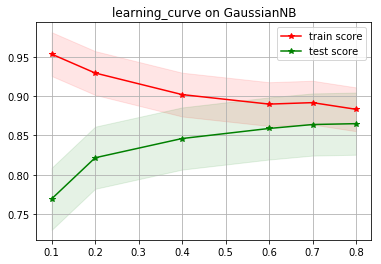

validation_curve:---------------param_range--------------
[0.1        0.14736842 0.19473684 0.24210526 0.28947368 0.33684211
 0.38421053 0.43157895 0.47894737 0.52631579 0.57368421 0.62105263
 0.66842105 0.71578947 0.76315789 0.81052632 0.85789474 0.90526316
 0.95263158 1.        ]
validation_curve:---------------train_scores--------------
[[0.99554566 0.9925761  0.99331849 0.99331849]
 [0.99480327 0.9925761  0.98069785 0.99406088]
 [0.99406088 0.99628805 0.99406088 0.99406088]
 [0.99628805 0.99703044 0.98886414 0.99406088]
 [0.99554566 0.99554566 0.98663697 0.99109131]
 [0.99406088 0.99628805 0.9925761  0.99331849]
 [0.99480327 0.99480327 0.99034892 0.99554566]
 [0.99554566 0.9918337  0.98589458 0.98144024]
 [0.99628805 0.9918337  0.98069785 0.99480327]
 [0.98069785 0.99331849 0.98292502 0.99034892]
 [0.9925761  0.98960653 0.98366741 0.9925761 ]
 [0.99406088 0.99034892 0.98515219 0.98886414]
 [0.99480327 0.99331849 0.98886414 0.99109131]
 [0.99628805 0.99703044 0.98886414 0.99034892]


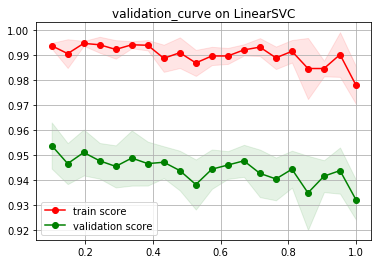

In [15]:
from sklearn.model_selection import learning_curve #加载学习曲线
from sklearn.model_selection import validation_curve #加载验证曲线
from sklearn.model_selection import ShuffleSplit #加载数据处理
 
from sklearn import datasets  #加载数据包
from sklearn.naive_bayes import GaussianNB#加载高斯贝叶斯
from sklearn.svm import LinearSVC #加载支持向量机
 
import numpy as np
import matplotlib.pyplot as plt

import warnings # ignore warning
warnings.filterwarnings('ignore')
 
# load dataset 
data=datasets.load_digits()
x=data.data
y=data.target
 
# split dataset     
cv=ShuffleSplit(test_size=0.25,random_state=0,n_splits=4) #处理数据，测试数据比例为0.25，4——折交叉
estimator=GaussianNB()
estimator.get_params().keys()  #可以获得学习算法参数
 
train_sizes=[0.1,0.2,0.4,0.6,0.7,0.8]
train_size,train_scores,test_scores=learning_curve(estimator,x,y,cv=cv,train_sizes=[0.1,0.2,0.4,0.6,0.7,0.8]) #获得学习曲线，针对不同的数据集
 
new_train_scores=train_scores.mean(1)
train_std=train_scores.std()
test_std=test_scores.std()
new_test_scores=test_scores.mean(1)

print('learning_curve:---------------train_size--------------')
print(train_sizes)
print('learning_curve:---------------train_scores--------------')
print(train_scores)
print('learning_curve:---------------test_scores--------------')
print(test_scores)


'''
画出不同比例数据集的学习曲线
'''
plt.grid()
plt.fill_between(train_sizes,new_train_scores-train_std,
                 new_train_scores+train_std,color='r',alpha=0.1)
plt.fill_between(train_sizes,new_test_scores-test_std,
                 new_test_scores+test_std,color='g',alpha=0.1)
 
plt.plot(train_sizes,new_train_scores,'*-',c='r',label='train score')
plt.plot(train_sizes,new_test_scores,'*-',c='g',label='test score')
plt.legend(loc='best')
plt.title("learning_curve on GaussianNB")
plt.show()

 
'''使用支持向量机，来做验证曲线'''
estimator2=LinearSVC()
estimator2.get_params().keys()#查看有哪些系数
train_score2,validation_score2=validation_curve(estimator2,x,y,param_name='C',cv=cv
                ,param_range=np.linspace(0.1,1,20)) #改变变量C，来看得分
 
x_axis=np.linspace(0.1,1,20)
train_score2_mean=train_score2.mean(1)
train_score2_std=train_score2.std(1)
validation_score2_mean=validation_score2.mean(1)
validation_score2_std=validation_score2.std(1)


print('validation_curve:---------------param_range--------------')
print(np.linspace(0.1,1,20))
print('validation_curve:---------------train_scores--------------')
print(train_score2)
print('validation_curve:---------------test_scores--------------')
print(validation_score2)
 
plt.grid()
plt.fill_between(x_axis,train_score2_mean-train_score2_std,
                 train_score2_mean+train_score2_std,color='r',alpha=0.1)
plt.fill_between(x_axis,validation_score2_mean-validation_score2_std,
                 validation_score2_mean+validation_score2_std,color='g',alpha=0.1)
 
plt.plot(x_axis,train_score2_mean,'o-',c='r',label='train score')
plt.plot(x_axis,validation_score2_mean,'o-',c='g',label='validation score')
plt.legend(loc='best')
plt.title("validation_curve on LinearSVC")
plt.show()


---
### Example with validation_curve
---
- If the training score and the validation score are both low, the estimator will be underfitting. 
- If the training score is high and the validation score is low, the estimator is overfitting and otherwise it is working very well. A low training score and a high validation score is usually not possible.

使用支持向量机，来做验证曲线
using the following gamma parameters: [1.00000000e-06 1.77827941e-05 3.16227766e-04 5.62341325e-03
 1.00000000e-01]
--------------- train scores --------------------
[[0.10188416 0.10174216 0.29207232 0.10208333 0.10194175]
 [0.94836008 0.94216028 0.93810848 0.93611111 0.95145631]
 [0.99581298 0.99372822 0.99374131 0.99375    0.99445215]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]]
--------------- test scores --------------------
[[0.10164835 0.10220994 0.27019499 0.10084034 0.10140845]
 [0.9010989  0.87845304 0.91922006 0.95238095 0.87323944]
 [0.95604396 0.93646409 0.98050139 0.98879552 0.93521127]
 [0.85164835 0.79281768 0.88579387 0.93277311 0.88732394]
 [0.10164835 0.10220994 0.11420613 0.10084034 0.10140845]]


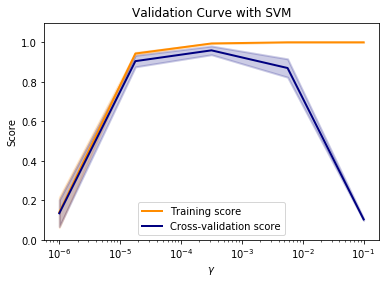

In [12]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
print("using the following gamma parameters: {}".format(param_range))

# cross-validation = 5, scoring = accuracy
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print('--------------- train scores --------------------')
print(train_scores)
print('--------------- test scores --------------------')
print(test_scores)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

---
### Example with learning_curve
---
A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out **how much we benefit from adding more training data** and whether the estimator suffers more from a variance error or a bias error. 

> - In Picture 1 with NaiveBayes, both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.


> - In picture 2 with SVM(rbf), the training score is much greater than the validation score for the maximum number of training samples, adding more training samples will most likely increase generalization.

使用支持向量机，来做验证曲线


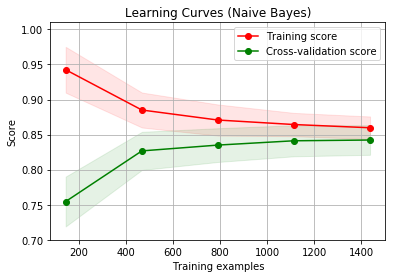

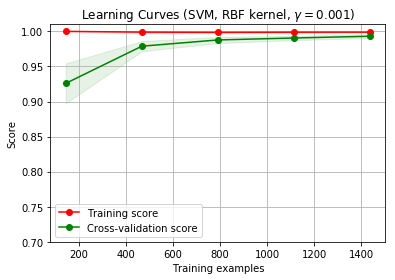

In [16]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

---
## accuracy_score
---
分类准确率分数是指所有分类正确的百分比。分类准确率这一衡量分类器的标准比较容易理解，但是它不能告诉你响应值的潜在分布，并且它也不能告诉你分类器犯错的类型。

```
sklearn.metrics.accuracy_score(y_true, 
                               y_pred, 
                               normalize=True, 
                               sample_weight=None)

normalize：默认值为True，返回正确分类的比例；如果为False，返回正确分类的样本数
```

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

print(accuracy_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred, normalize=False))


0.5
2


---
## recall_score
---
计算召回率。召回率 = 提取出的正确信息条数 /样本中的信息条数。通俗地说，就是所有准确的条目有多少被检索出来了。

- The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
- The recall is intuitively the ability of the classifier to find all the positive samples.
- The best value is 1 and the worst value is 0.


```
sklearn.metrics.recall_score(y_true, 
                             y_pred, 
                             labels=None, 
                             pos_label=1, 
                             average=’binary’, 
                             sample_weight=None)
```

Automatically created module for IPython interactive environment
Logistic:
	Brier: 0.099
	Precision: 0.872
	Recall: 0.851
	F1: 0.862

Naive Bayes:
	Brier: 0.118
	Precision: 0.857
	Recall: 0.876
	F1: 0.867

Naive Bayes + Isotonic:
	Brier: 0.098
	Precision: 0.883
	Recall: 0.836
	F1: 0.859

Naive Bayes + Sigmoid:
	Brier: 0.109
	Precision: 0.861
	Recall: 0.871
	F1: 0.866

Logistic:
	Brier: 0.099
	Precision: 0.872
	Recall: 0.851
	F1: 0.862

SVC:
	Brier: 0.163
	Precision: 0.872
	Recall: 0.852
	F1: 0.862

SVC + Isotonic:
	Brier: 0.100
	Precision: 0.853
	Recall: 0.878
	F1: 0.865

SVC + Sigmoid:
	Brier: 0.099
	Precision: 0.874
	Recall: 0.849
	F1: 0.861



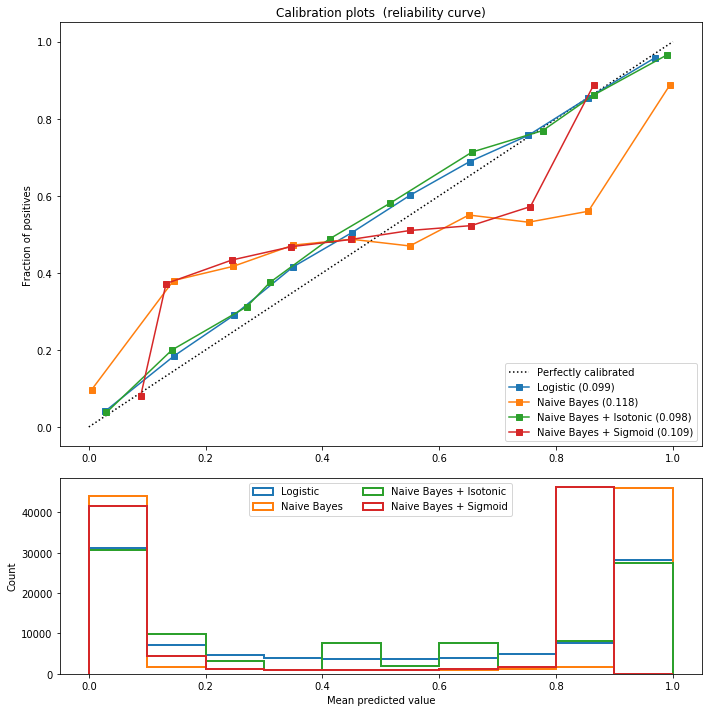

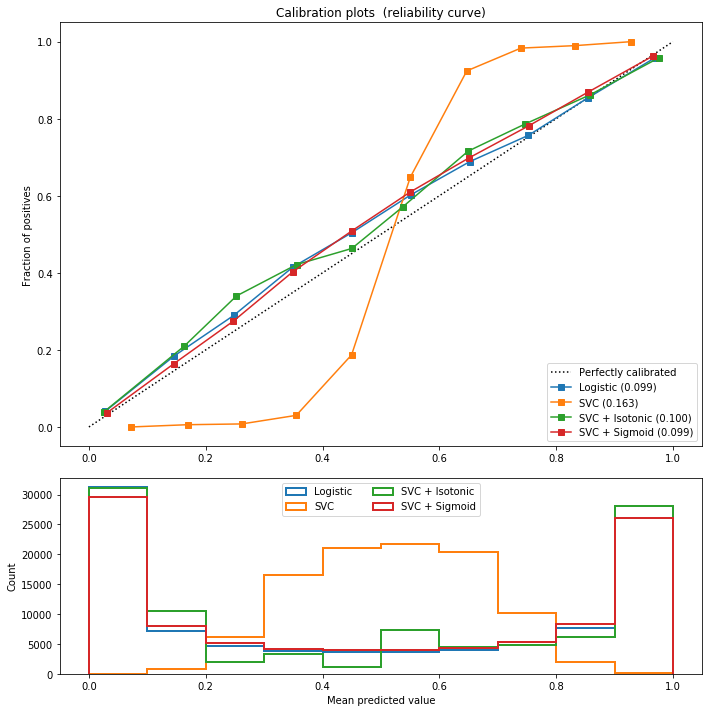

In [4]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD Style.

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split


# Create dataset of classification task with many redundant and few
# informative features
X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=10,
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99,
                                                    random_state=42)


def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1., solver='lbfgs')

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(GaussianNB(), "Naive Bayes", 1)

# Plot calibration curve for Linear SVC
plot_calibration_curve(LinearSVC(max_iter=10000), "SVC", 2)

plt.show()

In [21]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([0, 0, 1, 1])

from sklearn.svm import SVC
clf = SVC()
print('----------- Model -----------------')
print(clf.fit(X, y))

print('------------The result with decision function ----------------')
print(clf.decision_function(X))

print('------------The predict result with default --------------')
print(clf.predict(X))
print('------------The predict result with threshold ---------------')
b = clf.decision_function(X)
threshold=1
new_y = (b > threshold)
print(new_y)

threshold=2
new_y = (b > threshold)
print(new_y)

----------- Model -----------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
------------The result with decision function ----------------
[-1.00052254 -1.00006594  1.00029424  1.00029424]
------------The predict result with default --------------
[0 0 1 1]
------------The predict result with threshold ---------------
[False False  True  True]
[False False False False]
